# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [63]:
#Reading the dataset
import pandas as pd

df_bryant = pd.read_csv('./data/Bryant et al 2010.csv')
df_bryant.head()

renew req %  Pricing  Cellulosic cost  Total biomass  \
0         0.25        1       124.900001     612.799988   
1         0.25        1        67.300003     837.200012   
2         0.25        1        71.000000     740.400024   
3         0.25        1        80.099998     995.599976   
4         0.25        1        76.400002     476.399994   

   Feedstock distribution  Cellulosic yield  Oil elasticity  \
0                    0.04         89.500000           0.206   
1                    0.18         95.900002           0.277   
2                    0.80         83.500000           0.445   
3                    0.58         82.400002           0.291   
4                    0.79         97.500000           0.443   

   Demand elasticity  Electricity coproduction  oil supply shift  \
0             -0.469                      1.83             0.078   
1             -0.380                      0.01            -0.032   
2             -0.778                      0.25            -0.093   
3             -0.334                      0.08            -0.086   
4             -0.205                      1.59             0.073   

   Biomass backstop price  input record  Expen change  Incremental cost  \
0              162.199997          1001         60.00            276.47   
1              150.300003          1002         19.42             85.07   
2              135.800003          1003         17.76            200.11   
3               98.800003          1004         37.88            130.86   
4              163.500000          1006         66.13            180.11   

   Less than 10%  Greater than 90%  
0              0                 0  
1              0                 0  
2              0                 0  
3              0                 0  
4              0                 0

In [2]:
#subsetting the dataset into columns of experiments and outcomes format for further analysis
experiments = df_bryant.iloc[:, 2:11]
outcome = df_bryant.iloc[:, 15]

In [64]:
#uncertainties or dimensions
experiments.head()

SWITCH Market price determination SWITCH TGC obligation curve  \
0                                 1                           2   
1                                 2                           3   
2                                 1                           3   
3                                 2                           2   
4                                 1                           2   

  SWITCH carbon cap SWITCH carbon price determination SWITCH economic growth  \
0                 3                                 2                      5   
1                 2                                 1                      4   
2                 1                                 1                      3   
3                 3                                 2                      1   
4                 3                                 3                      4   

  SWITCH electrification rate SWITCH interconnection capacity expansion  \
0                           1                                         1   
1                           2                                         1   
2                           6                                         4   
3                           5                                         1   
4                           5                                         1   

  SWITCH lookup curve TGC SWITCH low reserve margin price markup  \
0                       2                                      1   
1                       1                                      3   
2                       2                                      4   
3                       2                                      2   
4                       2                                      2   

  SWITCH physical limits  ... starting construction time  \
0                      2  ...                   0.813530   
1                      2  ...                   1.712138   
2                      1  ...                   0.390609   
3                      1  ...                   2.069449   
4                      1  ...                   1.094902   

  time of nuclear power plant ban  uncertainty initial gross fuel costs  \
0                     2045.490971                              0.906060   
1                     2088.839530                              0.741120   
2                     2013.876882                              1.396959   
3                     2042.566070                              1.034850   
4                     2051.277387                              0.590479   

   weight factor carbon abatement  weight factor marginal investment costs  \
0                        8.761673                                 8.859864   
1                        4.573769                                 4.300891   
2                        9.374337                                 1.586548   
3                        3.912941                                 8.038037   
4                        3.663262                                 8.602380   

   weight factor technological familiarity  \
0                                 4.240532   
1                                 4.159390   
2                                 2.431839   
3                                 1.170614   
4                                 7.392188   

   weight factor technological growth potential      year   model     policy  
0                                      5.476591  0.939007  energy  no policy  
1                                      9.782508  0.964794  energy  no policy  
2                                      1.282010  1.070390  energy  no policy  
3                                      4.865733  0.979062  energy  no policy  
4                                      2.125345  1.073439  energy  no policy  

[5 rows x 48 columns]

#### In the context of scenario discovery, the outcome variable is typically a binary variable denoting whether a given set of inputs is of interest or not.

In [4]:
#outcomes table is an array of [0,1] signifying if the outcome is of interest or not
outcome.head()


0    0
1    0
2    0
3    0
4    0
Name: Greater than 90%, dtype: int64

In [5]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

#Prim algorithm with threshold 0.8 (80% outcomes of interest) and peeling away 0.1 (10%) each time
x = experiments
y = outcome
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha = 0.1)
box_bryant = prim_alg.find_box()

C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


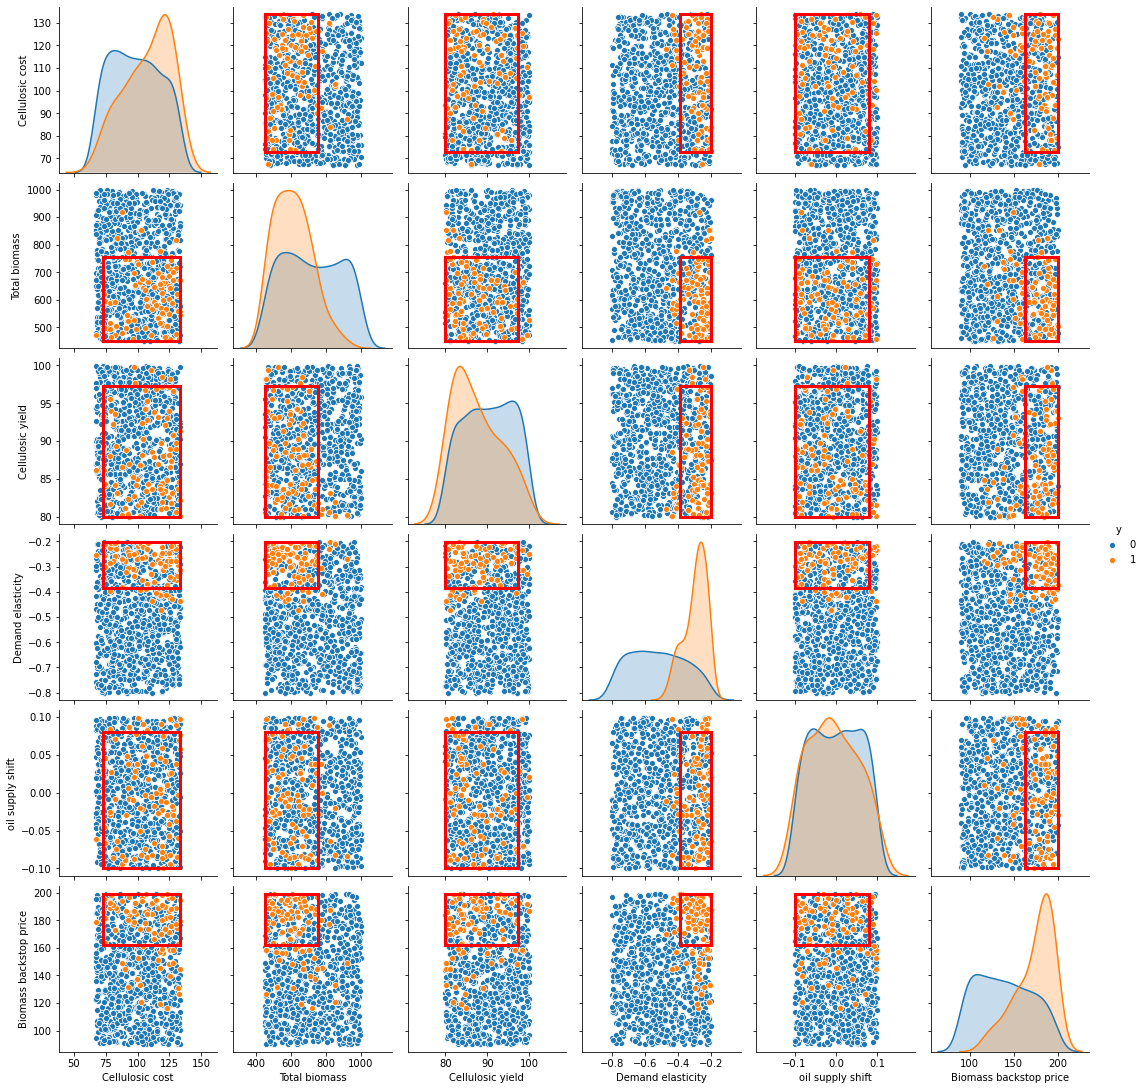

In [6]:
#Make a pair wise scatter plot of all the restricted dimensions with color denoting whether a given point is of
#interest or not and the boxlims superimposed on top.
box_bryant.show_pairs_scatter()

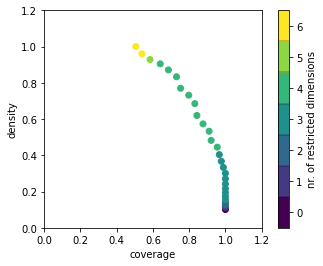

In [7]:
import matplotlib.pyplot as plt

#Visualize the trade off between coverage and density. Color is used to denote the number of restricted dimensions.
box_bryant.show_tradeoff()
plt.show()

In [8]:
#Interactive plot of the above tradeoff matrix
box_bryant.inspect_tradeoff()

alt.VConcatChart(...)

coverage     0.730337
density      0.833333
id                 22
mass        0.0884354
mean         0.833333
res_dim             4
Name: 22, dtype: object

                            box 22                                           
                               min         max                      qp values
Total biomass           450.000000  755.799988  [-1.0, 3.975269312730579e-06]
Demand elasticity        -0.422000   -0.202000  [5.677298162579917e-18, -1.0]
Biomass backstop price  155.550003  199.600006   [7.74627840480414e-14, -1.0]
Cellulosic cost          72.650002  133.699997     [0.1039150022362067, -1.0]



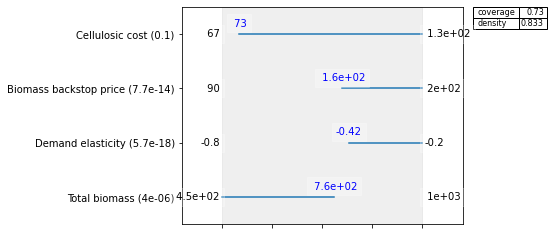

In [9]:
#Alternate way to look at the box in detail providing specific id. Write the stats and box limits of the 
#user specified box to
box_bryant.inspect(22)
box_bryant.inspect(22, style='graph')
plt.show()

In [10]:
#Trying to find another box which meets the criteria 
box2 = prim_alg.find_box()

[MainProcess/INFO] 837 points remaining, containing 44 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.5625, returning dump box


#### Another box of interest doesn't exist.

### Analysis

In [ ]:
#Write something here

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [11]:
import pandas as pd

df_rozenberg = pd.read_csv('./data/Rozenberg et al 2014.csv')

In [12]:
df_rozenberg

inequalities  convergence  population  behaviors  technologies  fossils  \
0               0            2           0          0             0        0   
1               0            2           0          0             0        0   
2               0            2           0          0             0        1   
3               0            2           0          0             0        1   
4               0            2           0          0             1        0   
..            ...          ...         ...        ...           ...      ...   
281             1            1           2          1             0        1   
282             1            1           2          1             1        0   
283             1            1           2          1             1        0   
284             1            1           2          1             1        1   
285             1            1           2          1             1        1   

     capital markets  SSP1  SSP2  SSP3  SSP4  SSP5  
0                  0     0     0     0     0     0  
1                  1     0     0     0     0     0  
2                  0     0     0     0     0     0  
3                  1     0     0     0     0     0  
4                  0     0     1     0     0     0  
..               ...   ...   ...   ...   ...   ...  
281                1     0     0     0     0     0  
282                0     1     0     0     0     0  
283                1     1     0     0     0     0  
284                0     0     0     0     0     0  
285                1     1     0     0     0     0  

[286 rows x 12 columns]

In [13]:
experiments_rozenberg = df_rozenberg.iloc[:, 0:7]
outcome_rozenberg = df_rozenberg.iloc[:, 7:12]

In [14]:
experiments_rozenberg.head()

inequalities  convergence  population  behaviors  technologies  fossils  \
0             0            2           0          0             0        0   
1             0            2           0          0             0        0   
2             0            2           0          0             0        1   
3             0            2           0          0             0        1   
4             0            2           0          0             1        0   

   capital markets  
0                0  
1                1  
2                0  
3                1  
4                0

In [15]:
outcome_rozenberg.head()

SSP1  SSP2  SSP3  SSP4  SSP5
0     0     0     0     0     0
1     0     0     0     0     0
2     0     0     0     0     0
3     0     0     0     0     0
4     0     1     0     0     0

### SSP1

In [16]:
from ema_workbench.analysis import prim

#PRIM for SSP1
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP1'], threshold=0.8, peel_alpha = 0.1)
box_ssp1_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


In [17]:
box_ssp1_1.inspect_tradeoff()

alt.VConcatChart(...)

In [18]:
box_ssp1_2 = prim_alg.find_box()

[MainProcess/INFO] 270 points remaining, containing 29 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.6875, returning dump box


### SSP2

In [75]:
#PRIM for SSP2
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP2'], threshold=0.5, peel_alpha = 0.1)
box_ssp2_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4


In [68]:
box_ssp2_1.inspect_tradeoff()

alt.VConcatChart(...)

### SSP3

In [69]:
#PRIM for SSP3
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP3'], threshold=0.5, peel_alpha = 0.1)
box_ssp3_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4


In [70]:
box_ssp3_1.inspect_tradeoff()

alt.VConcatChart(...)

### SSP4

In [73]:
#PRIM for SSP3
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP4'], threshold=0.8, peel_alpha = 0.1)
box_ssp4_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4


In [72]:
box_ssp4_1.inspect_tradeoff()

alt.VConcatChart(...)

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [19]:
import ema_workbench
experiments, outcomes = ema_workbench.util.utilities.load_results('./data/Hamarat et al 2013.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\lekha\Desktop\Quarter4\Model Based Decision Making\Lab\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz


In [20]:
experiments.head()

SWITCH Market price determination SWITCH TGC obligation curve  \
0                                 1                           2   
1                                 2                           3   
2                                 1                           3   
3                                 2                           2   
4                                 1                           2   

  SWITCH carbon cap SWITCH carbon price determination SWITCH economic growth  \
0                 3                                 2                      5   
1                 2                                 1                      4   
2                 1                                 1                      3   
3                 3                                 2                      1   
4                 3                                 3                      4   

  SWITCH electrification rate SWITCH interconnection capacity expansion  \
0                           1                                         1   
1                           2                                         1   
2                           6                                         4   
3                           5                                         1   
4                           5                                         1   

  SWITCH lookup curve TGC SWITCH low reserve margin price markup  \
0                       2                                      1   
1                       1                                      3   
2                       2                                      4   
3                       2                                      2   
4                       2                                      2   

  SWITCH physical limits  ... starting construction time  \
0                      2  ...                   0.813530   
1                      2  ...                   1.712138   
2                      1  ...                   0.390609   
3                      1  ...                   2.069449   
4                      1  ...                   1.094902   

  time of nuclear power plant ban  uncertainty initial gross fuel costs  \
0                     2045.490971                              0.906060   
1                     2088.839530                              0.741120   
2                     2013.876882                              1.396959   
3                     2042.566070                              1.034850   
4                     2051.277387                              0.590479   

   weight factor carbon abatement  weight factor marginal investment costs  \
0                        8.761673                                 8.859864   
1                        4.573769                                 4.300891   
2                        9.374337                                 1.586548   
3                        3.912941                                 8.038037   
4                        3.663262                                 8.602380   

   weight factor technological familiarity  \
0                                 4.240532   
1                                 4.159390   
2                                 2.431839   
3                                 1.170614   
4                                 7.392188   

   weight factor technological growth potential      year   model     policy  
0                                      5.476591  0.939007  energy  no policy  
1                                      9.782508  0.964794  energy  no policy  
2                                      1.282010  1.070390  energy  no policy  
3                                      4.865733  0.979062  energy  no policy  
4                                      2.125345  1.073439  energy  no policy  

[5 rows x 48 columns]

In [21]:
data = outcomes['fraction renewables']
data

array([[0.31618923, 0.31619009, 0.31619254, ..., 0.26765659, 0.26730603,
        0.26695362],
       [0.31508598, 0.31508735, 0.31509113, ..., 0.44931963, 0.44940147,
        0.44947988],
       [0.31839272, 0.31839353, 0.31839618, ..., 0.59941703, 0.59934622,
        0.59928203],
       ...,
       [0.31783172, 0.3178325 , 0.31783482, ..., 0.49547905, 0.49593133,
        0.49639055],
       [0.31375358, 0.31375462, 0.31375748, ..., 0.38203168, 0.3821263 ,
        0.38222334],
       [0.31789917, 0.3179003 , 0.31790349, ..., 0.31051478, 0.3102605 ,
        0.31000748]])

In [25]:
data.shape

(5000, 641)

#### It is difficult to analyse the dataset with PRIM because 1. the outcome of interest is a formula instead of a binary 0 or 1 and 2. The format is a horizontal array while the rest of the experiments is in a dataframe format 3. It also doesn't help the case that the experiments and outcomes come as two different datasets and not merged as one which makes data manipulation easy 

#### Question - How to know which is the end state and the initial value in a 5000x641 shaped fraction renewables outcome of interest?

In [39]:
## Underlying model is a SD model and non linear - that's why PCA would help. Outcomes are located along the diagonal
## Remove categorical variables 

#An idea - throw a linear classification tree algorithm at this dataset and see if it works

In [28]:
y = data[0,:] < data[-1, :]

In [57]:
# y

In [31]:
#Changing boolean outcome array to numeric [0,1] one
y1 = y.astype(int)

In [58]:
# y1

In [34]:
# data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
# r1 = outcomes[y1] < t1
# r2 = outcomes[y2] > t2
# r3 = outocmes[y3] < t3
# rc = r1 or (r2 or r3)

In [40]:
experiments.dtypes

SWITCH Market price determination               category
SWITCH TGC obligation curve                     category
SWITCH carbon cap                               category
SWITCH carbon price determination               category
SWITCH economic growth                          category
SWITCH electrification rate                     category
SWITCH interconnection capacity expansion       category
SWITCH lookup curve TGC                         category
SWITCH low reserve margin price markup          category
SWITCH physical limits                          category
SWITCH storage for intermittent supply          category
SWTICH preference carbon curve                  category
demand fuel price elasticity factor              float64
economic lifetime biomass                        float64
economic lifetime coal                           float64
economic lifetime gas                            float64
economic lifetime hydro                          float64
economic lifetime igcc         

In [51]:
#Dropping 

df = experiments

df = df.drop(df.iloc[:,0:12], axis=1)

df = df.drop(df.iloc[:,34:36], axis=1)
# experiments.iloc[[0, 50, 100, 150], :]

In [44]:
experiments.iloc[:,0:12]

SWITCH Market price determination SWITCH TGC obligation curve  \
0                                    1                           2   
1                                    2                           3   
2                                    1                           3   
3                                    2                           2   
4                                    1                           2   
...                                ...                         ...   
4995                                 1                           1   
4996                                 1                           2   
4997                                 1                           1   
4998                                 1                           3   
4999                                 1                           1   

     SWITCH carbon cap SWITCH carbon price determination  \
0                    3                                 2   
1                    2                                 1   
2                    1                                 1   
3                    3                                 2   
4                    3                                 3   
...                ...                               ...   
4995                 1                                 1   
4996                 3                                 1   
4997                 3                                 1   
4998                 3                                 1   
4999                 1                                 3   

     SWITCH economic growth SWITCH electrification rate  \
0                         5                           1   
1                         4                           2   
2                         3                           6   
3                         1                           5   
4                         4                           5   
...                     ...                         ...   
4995                      3                           2   
4996                      3                           5   
4997                      3                           4   
4998                      6                           3   
4999                      1                           1   

     SWITCH interconnection capacity expansion SWITCH lookup curve TGC  \
0                                            1                       2   
1                                            1                       1   
2                                            4                       2   
3                                            1                       2   
4                                            1                       2   
...                                        ...                     ...   
4995                                         4                       1   
4996                                         1                       1   
4997                                         1                       3   
4998                                         1                       1   
4999                                         4                       1   

     SWITCH low reserve margin price markup SWITCH physical limits  \
0                                         1                      2   
1                                         3                      2   
2                                         4                      1   
3                                         2                      1   
4                                         2                      1   
...                                     ...                    ...   
4995                                      3                      1   
4996                                      2                      1   
4997                                      2                      1   
4998                                      3                      1   
4999                                      1                      2   

    

In [52]:
df.dtypes

demand fuel price elasticity factor             float64
economic lifetime biomass                       float64
economic lifetime coal                          float64
economic lifetime gas                           float64
economic lifetime hydro                         float64
economic lifetime igcc                          float64
economic lifetime ngcc                          float64
economic lifetime nuclear                       float64
economic lifetime pv                            float64
economic lifetime wind                          float64
investment proportionality constant             float64
investors desired excess capacity investment    float64
maximum battery storage uncertainty constant    float64
maximum no storage penetration rate pv          float64
maximum no storage penetration rate wind        float64
price demand elasticity factor                  float64
price volatility global resource markets        float64
progress ratio biomass                          

In [53]:
#PCA processing on the data

processed = ema_workbench.analysis.prim.pca_preprocess(df,y1)

C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\ema_workbench\analysis\prim_util.py:177: RuntimeWarning: invalid value encountered in sqrt
  np.linalg.norm(eigen_vectors[:, i]) * np.sqrt(eigen_vals[i])


In [55]:
type(processed)

tuple

#### How to use the newly processed data now?

In [59]:
processed

(           r_0       r_1       r_2       r_3       r_4       r_5       r_6  \
 0     4.291334  0.323535 -0.124816  0.061109  0.399066  0.107004 -0.161229   
 1    -3.497540  0.323535 -0.124816  0.061109  0.399066  0.107004 -0.161229   
 2     2.154189 -0.052700  0.259004 -1.358342  0.277183  0.506153  1.277533   
 3     0.776109 -0.684708  0.018861  0.839575 -0.289207 -0.307573  0.195946   
 4    -1.316157  0.385390  0.582498  0.929638 -0.142103  1.103980  2.451522   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4995  0.398945 -0.732489 -0.066711 -0.620133 -0.246586  0.013552  1.440080   
 4996 -0.075737 -0.891258 -0.684173 -2.007439 -0.395993  1.524716 -1.278606   
 4997 -0.641920 -0.030142  0.418598  0.624616  0.197770 -0.015079 -0.912169   
 4998 -0.954711 -1.842206 -0.370506  1.733201  0.502859 -0.172011 -0.870211   
 4999 -1.617808 -1.946521 -0.558069 -1.169509  0.664433  0.315917  0.054260   
 
            r_7       r_8       r_9  ...      r_24

In [60]:
exp, out = processed

In [61]:
exp

r_0       r_1       r_2       r_3       r_4       r_5       r_6  \
0     4.291334  0.323535 -0.124816  0.061109  0.399066  0.107004 -0.161229   
1    -3.497540  0.323535 -0.124816  0.061109  0.399066  0.107004 -0.161229   
2     2.154189 -0.052700  0.259004 -1.358342  0.277183  0.506153  1.277533   
3     0.776109 -0.684708  0.018861  0.839575 -0.289207 -0.307573  0.195946   
4    -1.316157  0.385390  0.582498  0.929638 -0.142103  1.103980  2.451522   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.398945 -0.732489 -0.066711 -0.620133 -0.246586  0.013552  1.440080   
4996 -0.075737 -0.891258 -0.684173 -2.007439 -0.395993  1.524716 -1.278606   
4997 -0.641920 -0.030142  0.418598  0.624616  0.197770 -0.015079 -0.912169   
4998 -0.954711 -1.842206 -0.370506  1.733201  0.502859 -0.172011 -0.870211   
4999 -1.617808 -1.946521 -0.558069 -1.169509  0.664433  0.315917  0.054260   

           r_7       r_8       r_9  ...      r_24      r_25      r_26  \
0     0.841104 -0.276177 -0.374883  ...  0.759142 -0.842075  0.466871   
1     0.841104 -0.276177 -0.374883  ...  0.759142 -0.842075  0.466871   
2    -0.994212  0.187472  0.724747  ... -2.064148  1.570773 -0.910195   
3     0.481508 -0.985967 -0.905073  ...  0.574365 -1.418308 -0.623213   
4     0.518542 -0.595664  0.181309  ... -0.373267  0.880011 -0.465003   
...        ...       ...       ...  ...       ...       ...       ...   
4995 -0.157130  0.303810 -0.153363  ...  0.895496 -0.396581  0.369682   
4996 -0.355869 -0.204600  0.883139  ...  0.649042 -0.178952  0.414915   
4997  1.871288  0.289507  1.610519  ...  0.817042 -0.708863  0.393252   
4998  0.410223  0.371028  1.240598  ... -0.249656 -1.901897 -0.349493   
4999  0.937947  0.612411  0.150222  ...  0.497861  1.120741 -0.840863   

          r_27      r_28      r_29      r_30      r_31      r_32      r_33  
0    -1.231604 -1.642848 -0.781466 -0.664133 -0.440228  0.407164  0.230165  
1    -1.231604 -1.642848 -0.781466 -0.664133 -0.440228  0.407164  0.230165  
2     1.634435  0.211214  0.718964 -2.725404  0.919621  0.411504  0.117691  
3     1.351922  2.106671  0.265671  1.781241  0.096265  0.732131 -0.087910  
4    -0.844057  0.816123  0.737722  0.383693 -1.541497  1.090980 -0.980717  
...        ...       ...       ...       ...       ...       ...       ...  
4995 -0.627560 -0.157994  2.133285 -0.129795 -0.242785 -1.166083 -0.139317  
4996 -0.165417 -0.046380  0.974408  1.233228  0.492237  0.172302  0.877248  
4997 -1.037388  0.345386 -1.554820 -0.325458 -1.080871  1.766419 -1.933237  
4998 -1.659847 -0.517755 -0.919148  0.942809  0.025175  1.023610 -1.411815  
4999 -1.072747  2.055591  0.518138 -0.416146 -0.502875  0.239085  0.069065  

[5000 rows x 34 columns]

In [62]:
out

r_0       r_1       r_2  \
demand fuel price elasticity factor          -0.157892 -0.030176 -0.062014   
economic lifetime biomass                    -0.253807  0.045829 -0.371355   
economic lifetime coal                        0.029926 -0.026016  0.030714   
economic lifetime gas                         0.214541  0.005525 -0.270756   
economic lifetime hydro                      -0.142468  0.094939  0.085457   
economic lifetime igcc                       -0.311146 -0.466121 -0.268223   
economic lifetime ngcc                        0.338902  0.228004  0.080949   
economic lifetime nuclear                    -0.196048 -0.151048 -0.476041   
economic lifetime pv                          0.019822 -0.017585  0.006460   
economic lifetime wind                        0.032978 -0.055378  0.016936   
investment proportionality constant           0.249129 -0.090208 -0.214404   
investors desired excess capacity investment -0.047411  0.053436 -0.002435   
maximum battery storage uncertainty constant -0.220440 -0.224320  0.378097   
maximum no storage penetration rate pv       -0.001590 -0.000587  0.001012   
maximum no storage penetration rate wind      0.125695 -0.017402 -0.045680   
price demand elasticity factor                0.081514  0.077546  0.061735   
price volatility global resource markets     -0.073970 -0.005396  0.087644   
progress ratio biomass                        0.233749  0.120965 -0.295162   
progress ratio coal                           0.114251  0.050953 -0.036158   
progress ratio gas                            0.043326  0.038544  0.085095   
progress ratio hydro                          0.077087 -0.004313  0.002336   
progress ratio igcc                          -0.010376  0.003979  0.001134   
progress ratio ngcc                          -0.118558  0.070122 -0.061126   
progress ratio nuclear                       -0.019825 -0.008498  0.014254   
progress ratio pv                             0.097052 -0.007234  0.080342   
progress ratio wind                           0.368634 -0.579847  0.119206   
starting construction time                   -0.137813 -0.022335 -0.015656   
time of nuclear power plant ban              -0.221600  0.288888 -0.094814   
uncertainty initial gross fuel costs          0.073358 -0.035332  0.063064   
weight factor carbon abatement                0.206952  0.340701 -0.216858   
weight factor marginal investment costs       0.225289 -0.188728 -0.021961   
weight factor technological familiarity       0.004010 -0.002890 -0.000651   
weight factor technological growth potential -0.212785  0.163981  0.296200   
year                                         -0.057345  0.018834  0.002378   

                                                   r_3       r_4       r_5  \
demand fuel price elasticity factor           0.208460 -0.257713 -0.446723   
economic lifetime biomass                    -0.227400  0.164883  0.020418   
economic lifetime coal                        0.047243  0.040113 -0.058311   
economic lifetime gas                        -0.016633  0.107738 -0.426103   
economic lifetime hydro                       0.147004  0.204341  0.099567   
economic lifetime igcc                        0.010881  0.111469 -0.273119   
economic lifetime ngcc                       -0.115515 -0.086520  0.023392   
economic lifetime nuclear                     0.084327 -0.023128  0.267251   
economic lifetime pv                         -0.010728  0.025062 -0.008619   
economic lifetime wind                       -0.043104  0.047711 -0.099185   
investment proportionality constant           0.653677 -0.069651  0.097978   
investors desired excess capacity investment -0.030964  0.008152  0.101284   
maximum battery storage uncertainty constant  0.019322  0.335906 -0.121938   
maximum no storage penetration rate pv       -0.002963 -0.000898  0.001715   
maximum no storage penetration rate wind     -0.184365 -0.133158  0.018082   
price demand elasticity factor                0.027763 -0.074725 -0.1174